In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [59]:
train = pd.read_csv("/content/drive/MyDrive/machine learning/datasets_ml/house price prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/machine learning/datasets_ml/house price prediction/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
#drop id column
train.drop("Id", axis = 1, inplace=True)

In [61]:
def del_null(data):
  null_percent = ((data.isnull().sum()/data.shape[0])*100) # find null percentage of columns in whole data

  cols_to_drop = null_percent[null_percent>40].index  #provide a list of cols with nullpercentage>40
  data.drop(cols_to_drop,axis=1, inplace =True)       #drop columns with nullpercentage>40

In [62]:
def null(data):
  return data.isnull().sum()

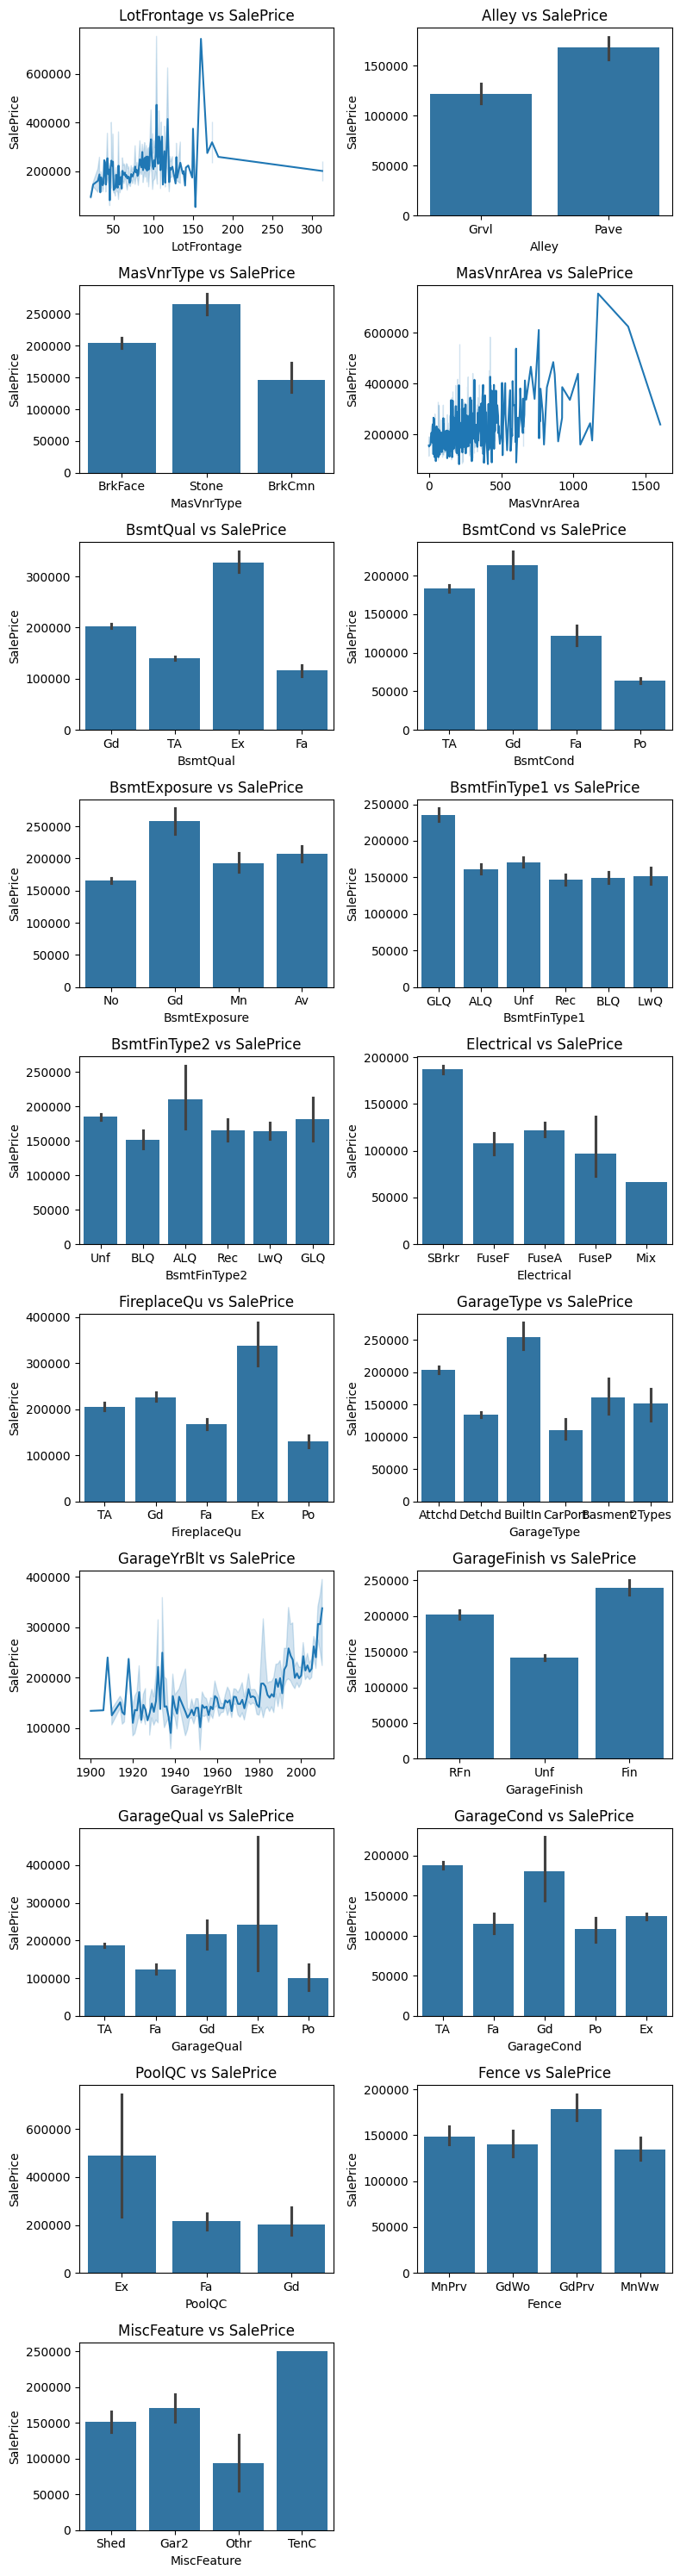

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

def graphic_ploter(data):
    null_col_list = data.columns[data.isnull().sum() > 0]  # get columns with nulls
    n_cols = 2  # number of columns in the subplot grid
    n_rows = (len(null_col_list) + 1) // n_cols  # calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,3*n_rows))
    axes = axes.flatten()  # flatten in case of multiple rows

    for i, col in enumerate(null_col_list):
        ax = axes[i]
        if col in ["LotFrontage","MasVnrArea","GarageYrBlt"]:
            sns.lineplot(x=col, y="SalePrice", data=data, ax=ax)
        else:
            sns.barplot(x=col, y="SalePrice", data=data, ax=ax)
        ax.set_title(f"{col} vs SalePrice")

    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
graphic_ploter(train)


In [53]:
#filling null values with mean

def null_filler(data):
  # Update null_col_list to reflect columns remaining after del_null
  null_col_list = null(data)[null(data)>0].index
  for i in null_col_list:
    if i in ["LotFrontage","MasVnrArea","GarageYrBlt"]:
      data[i] = data[i].fillna(data[i].mean())
    else:
      data[i] = data[i].fillna(data[i].mode()[0])

In [55]:
def Cleaning(data):
  del_null(data)
  null_filler(data)
Cleaning(train)

In [56]:
null(train).to_string()

'MSSubClass       0\nMSZoning         0\nLotArea          0\nStreet           0\nLotShape         0\nLandContour      0\nUtilities        0\nLotConfig        0\nLandSlope        0\nNeighborhood     0\nCondition1       0\nCondition2       0\nBldgType         0\nHouseStyle       0\nOverallQual      0\nOverallCond      0\nYearBuilt        0\nYearRemodAdd     0\nRoofStyle        0\nRoofMatl         0\nExterior1st      0\nExterior2nd      0\nExterQual        0\nExterCond        0\nFoundation       0\nBsmtFinSF1       0\nBsmtFinSF2       0\nBsmtUnfSF        0\nTotalBsmtSF      0\nHeating          0\nHeatingQC        0\nCentralAir       0\n1stFlrSF         0\n2ndFlrSF         0\nLowQualFinSF     0\nGrLivArea        0\nBsmtFullBath     0\nBsmtHalfBath     0\nFullBath         0\nHalfBath         0\nBedroomAbvGr     0\nKitchenAbvGr     0\nKitchenQual      0\nTotRmsAbvGrd     0\nFunctional       0\nFireplaces       0\nGarageCars       0\nGarageArea       0\nPavedDrive       0\nWoodDeckSF       0\

In [23]:
#encoding for string values
def Encoding(data):
  obj_cols = data.select_dtypes("object").columns
  encoder = LabelEncoder()
  for cols in obj_cols:
    data[cols] = encoder.fit_transform(data[cols])
Encoding(train)
train.sample(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
290,60,3,15611,1,3,3,0,4,0,5,...,0,0,0,0,0,7,2006,6,5,233230
983,60,3,11250,1,3,3,0,0,0,5,...,0,0,0,0,0,5,2008,8,4,255900
1060,120,3,4920,1,3,3,0,4,0,22,...,170,0,0,0,0,4,2010,8,4,213500
1237,60,3,12393,1,1,3,0,2,0,5,...,0,0,0,0,0,9,2006,8,4,195000
702,60,3,12438,1,0,3,0,4,0,22,...,0,0,0,0,0,7,2006,6,5,361919


In [24]:
year_cols = train.filter(like ="Year").columns
year_cols= year_cols.append(train.filter(like ="Yr").columns)
year_cols
final = train.drop(year_cols,axis=1)
#feat_names = final.columns.tolist()
train.shape,final.shape

((1460, 61), (1460, 58))

#Scaling

In [25]:
ss = StandardScaler()
scaled_data = ss.fit_transform(final)

final_df = pd.DataFrame(scaled_data,columns= final.columns)
final_df.shape

(1460, 58)

In [34]:
#train_test_split on scaled data

X = final_df.drop("SalePrice",axis=1)
y = final_df["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#training score = 98% and testing score = 75% about 80% on random state 42

In [32]:
# train_test_split on data without year columns
X = final.drop("SalePrice",axis=1)
y = final["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#training score = 98% and testing score = 76% on randomstate = 4 and on randomstate 42 it is 81%

In [30]:
#train_test_split on data with year columns
X = train.drop("SalePrice",axis=1)
y = train["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#training score = 98% and testing score = 80%

In [27]:
dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=10)

In [28]:
dt_model.score(X_train,y_train)

0.9844312693676754

In [35]:
dt_model.score(X_test,y_test)

0.7890587135154108

In [36]:
dt_model.feature_importances_



array([7.84498804e-04, 4.44054957e-03, 1.30039448e-02, 0.00000000e+00,
       8.02769125e-04, 7.46551345e-04, 0.00000000e+00, 2.35107812e-05,
       1.72571675e-03, 1.68078048e-02, 6.85101306e-04, 5.13046109e-04,
       1.16649809e-06, 2.78470374e-04, 6.44362099e-01, 7.80285412e-03,
       1.41860780e-04, 1.08742724e-03, 4.95926052e-04, 2.32476766e-04,
       8.60503075e-04, 5.71584065e-05, 1.76171151e-03, 1.63894622e-02,
       3.20445195e-04, 4.82046011e-03, 4.81769336e-02, 1.02574262e-04,
       2.36331055e-04, 7.15156031e-03, 1.96718642e-02, 3.13659302e-02,
       5.50572287e-04, 1.04141606e-01, 2.18439815e-04, 0.00000000e+00,
       7.90697905e-04, 4.59203639e-05, 9.92664507e-04, 3.18100410e-04,
       2.49282163e-03, 1.45376759e-03, 2.63636329e-03, 3.64748165e-03,
       8.39304194e-03, 1.37413881e-02, 7.20525505e-04, 1.33417499e-02,
       4.13083915e-03, 7.16217575e-04, 3.01423902e-04, 7.37243590e-04,
       0.00000000e+00, 0.00000000e+00, 7.74119956e-03, 6.86696431e-04,
      

In [37]:
dt_model.feature_names_in_

array(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition'], dtype=object)

In [38]:
pd.Series(dt_model.feature_importances_, index=dt_model.feature_names_in_).sort_values(ascending=False)

,0
OverallQual,0.644362
GrLivArea,0.104142
TotalBsmtSF,0.048177
2ndFlrSF,0.031366
1stFlrSF,0.019672
Neighborhood,0.016808
BsmtFinSF1,0.016389
GarageArea,0.013741
WoodDeckSF,0.013342
LotArea,0.013004


In [ ]:
#conclusivily scaling in decision tree doesn,t provide any much better result than non scaled data as it is going to split in the end